In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [73]:
stocktrain = pd.read_csv("kotrain.csv")
stocktest = pd.read_csv("kotest.csv")

In [74]:
#preparing the train data
perchange = stocktrain.loc[:,"Percentchange"]
price = stocktrain.loc[:,"Price"]
perchange_std = perchange.rolling(window=5).std()
perchange_mean = perchange.rolling(window=5).mean()
price_std = price.rolling(window=5).std()
price_mean = price.rolling(window=5).mean()
newdf = pd.DataFrame({"Perchange Std" : perchange_std[4:]*100,
                      "Perchange Mean" : perchange_mean[4:]*100,
                      "Price Std" : price_std[4:],
                      "Price Mean" : price_std[4:]
                     })
newdf.head()

,Perchange Std,Perchange Mean,Price Std,Price Mean
4,0.305355,0.05700,0.100598,0.100598
5,0.310252,0.04286,0.079056,0.079056
6,0.406837,0.11820,0.122475,0.122475
7,0.439402,0.07138,0.112916,0.112916
8,0.408445,0.03350,0.125817,0.125817


In [75]:
#preparing the test data 
perchange1 = stocktest.loc[:,"Percentchange"]
price1 = stocktest.loc[:,"Price"]
perchange1_std = perchange1.rolling(window=5).std()
perchange1_mean = perchange1.rolling(window=5).mean()
price1_std = price1.rolling(window=5).std()
price1_mean = price1.rolling(window=5).mean()
testdf = pd.DataFrame({"Perchange Std" : perchange1_std[4:]*100,
                      "Perchange Mean" : perchange1_mean[4:]*100,
                      "Price Std" : price1_std[4:],
                      "Price Mean" : price1_std[4:]
                     })
testdf.head()

,Perchange Std,Perchange Mean,Price Std,Price Mean
4,0.660137,0.44292,0.416616,0.416616
5,0.627348,0.61544,0.588837,0.588837
6,0.627188,0.61634,0.699835,0.699835
7,0.553398,0.65862,0.570964,0.570964
8,0.549806,0.69160,0.366715,0.366715


In [76]:
#fitting model and printing score and prediction
model = hmm.GaussianHMM(n_components=4)
fit = model.fit(newdf.iloc[:,0:2])

pred = model.predict(newdf.iloc[:,0:2])
pred1 = model.predict(testdf.iloc[:,0:2])

score = model.score(newdf.iloc[:,0:2])
score1 = model.score(testdf.iloc[:,0:2])

print(pred)
print(pred1)

print(score)
print(score1)

[2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 0 0 0 0 0 2 2 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 1 1 0 0 3 3 3 3 3 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 0 0 0 1 1 1 1 0 0 3 3 3 3 3 2 2 2 2 0 0 0 3 3 3 3 3 3 3 2
 2 1 1 1 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 2 2 2 2 2 2 2 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3
 3 3 3 0 0 1 1 1 1 0 3 3 3 3 3 2 2 2 2 1

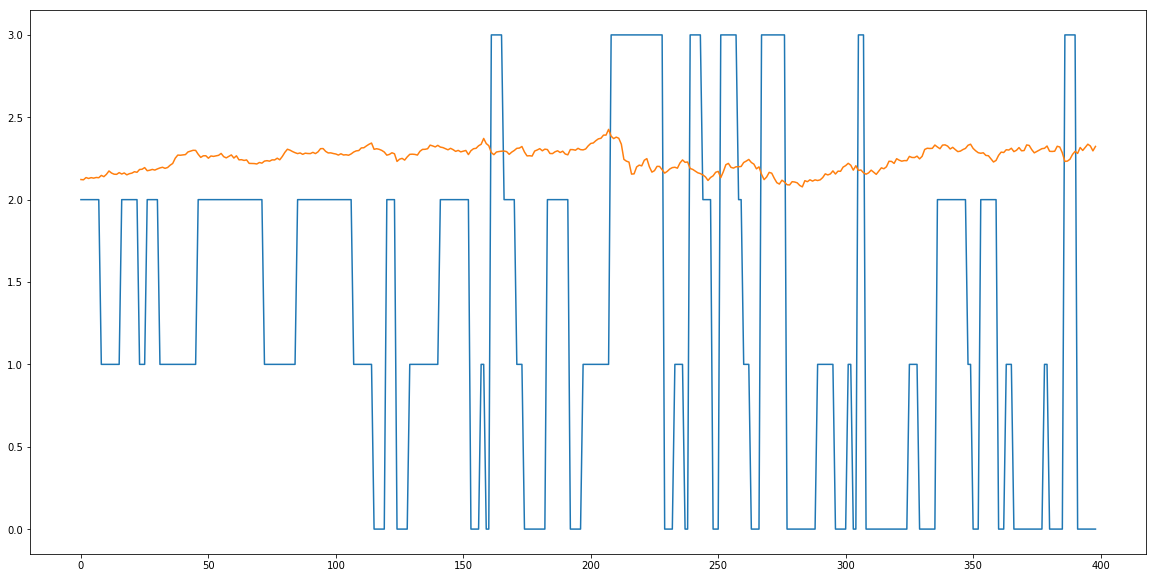

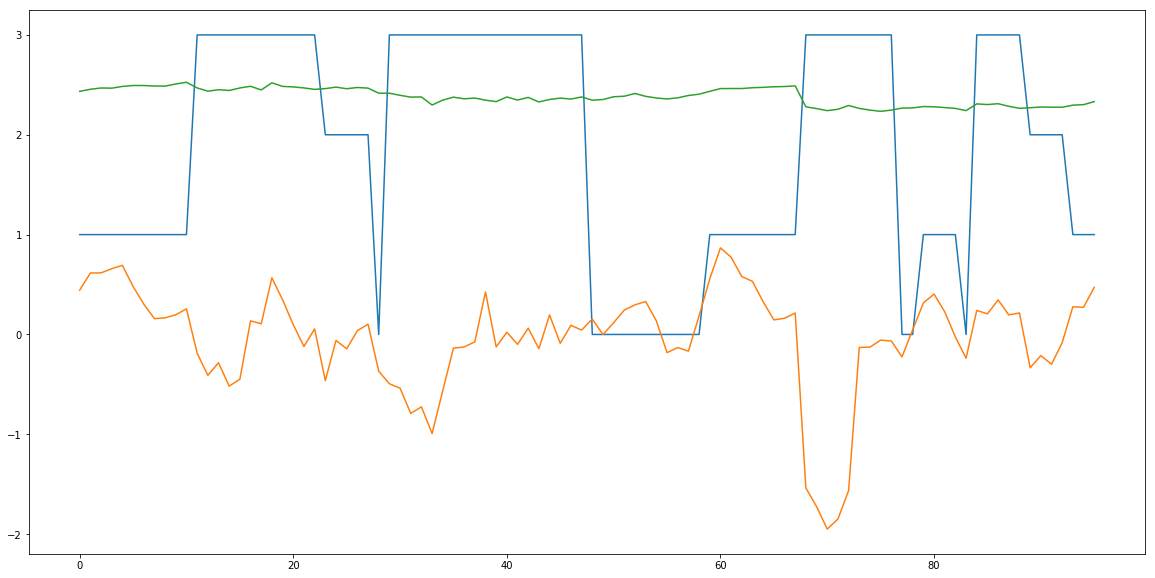

In [77]:
#plotting stock price and prediction to observe trends 
plt.figure(figsize=(20,10))
plt.plot(np.arange(pred.shape[0]), pred)
y = stocktrain.loc[:,"Price"]/20
plt.plot(np.arange(pred.shape[0]),  y.iloc[4:])
plt.show()

plt.figure(figsize=(20,10))
plt.plot(np.arange(pred1.shape[0]), pred1)
y = stocktest.loc[:,"Price"]/20
y1 = testdf.loc[:, "Perchange Mean"]
plt.plot(np.arange(pred1.shape[0]), y1)
plt.plot(np.arange(pred1.shape[0]),  y.iloc[4:])
plt.show()

In [78]:
model.means_

array([[ 0.83086712,  0.08174457],
       [ 0.44871797,  0.27675396],
       [ 0.45377605, -0.10517509],
       [ 1.27097385, -0.32142345]])

In [79]:
high_std_highneg_mean = 2
high_std_lowpos_mean = 0
med_std_highpos_mean = 1
med_std_lowneg_mean = 3

In [92]:
#Main Strategy 1

last_price = price[4]
profit = 0
bought = False
times_bought = 0
times_sold = 0
for i in range(1,len(pred)):
    curr_price = price[4+i]
    state = pred[i]
    prev_state = pred[i-1]
    if (state != med_std_highpos_mean and state != high_std_lowpos_mean) and (prev_state == med_std_highpos_mean or prev_state == high_std_lowpos_mean) and bought:
        #sell
        profit += curr_price - last_price
        bought = False
        times_sold += 1
    elif (state == med_std_highpos_mean or state == high_std_lowpos_mean) and (prev_state != med_std_highpos_mean and prev_state != high_std_lowpos_mean):
        #buy
        last_price = curr_price
        bought = True
        times_bought += 1
if bought:
 # sell if still holding on
    profit += curr_price - last_price
    bought = False
    times_sold += 1
    
print(times_bought)
print(times_sold)
profit

17
17


8.270000999999993

In [90]:
#Main Strategy 2 

last_price = price[4]
profit = 0
bought = False
times_bought = 0
times_sold = 0
for i in range(1,len(pred)):
    curr_price = price[4+i]
    state = pred[i]
    prev_state = pred[i-1]
    if state != med_std_highpos_mean and prev_state == med_std_highpos_mean and bought:
        #sell
        profit += curr_price - last_price
        bought = False
        times_sold += 1
    elif state == med_std_highpos_mean and prev_state != med_std_highpos_mean and not bought:
        #buy
        last_price = curr_price
        bought = True
        times_bought += 1
if bought:
    # sell if still holding on
    profit += curr_price - last_price
    bought = False
    times_sold += 1
    
print(times_bought)
print(times_sold)
profit

17
17


4.390008000000016

In [91]:
baselineprofit = price[399]-price[4]
baselineprofit

4.290000999999997

In [93]:
#for testing dataset
last_price = price1[4]
profit = 0
bought = False
times_bought = 0
times_sold = 0
for i in range(1,len(pred1)):
    curr_price = price1[4+i]
    state = pred1[i]
    prev_state = pred1[i-1]
    if (state != med_std_highpos_mean and state != high_std_lowpos_mean) and (prev_state == med_std_highpos_mean or prev_state == high_std_lowpos_mean) and bought:
        #sell
        profit += curr_price - last_price
        bought = False
        times_sold += 1
    elif (state == med_std_highpos_mean or state == high_std_lowpos_mean) and (prev_state != med_std_highpos_mean and prev_state != high_std_lowpos_mean):
        #buy
        last_price = curr_price
        bought = True
        times_bought += 1
if bought:
 # sell if still holding on
    profit += curr_price - last_price
    bought = False
    times_sold += 1
    
print(times_bought)
print(times_sold)
profit

4
4


0.20999899999999627

In [94]:
last_price = price1[4]
profit = 0
bought = False
times_bought = 0
times_sold = 0
for i in range(1,len(pred1)):
    curr_price = price1[4+i]
    state = pred1[i]
    prev_state = pred1[i-1]
    if state != med_std_highpos_mean and prev_state == med_std_highpos_mean and bought:
        #sell
        profit += curr_price - last_price
        bought = False
        times_sold += 1
    elif state == med_std_highpos_mean and prev_state != med_std_highpos_mean and not bought:
        #buy
        last_price = curr_price
        bought = True
        times_bought += 1
if bought:
    # sell if still holding on
    profit += curr_price - last_price
    bought = False
    times_sold += 1
    
print(times_bought)
print(times_sold)
profit

3
3


-3.210003999999998

In [95]:
baseline2 = price1[99]-price1[4]
baseline2

-2.0500000000000043